In [1]:
import quandl
quandl.ApiConfig.api_key = 'INSERT YOU API KEY HERE'

# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT','TSLA'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close','open','high','low','close','volume'] }, 
                        date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                        paginate=True)
data.head()


,ticker,date,adj_close,open,high,low,close,volume
None,,,,,,,,
0,WMT,2016-12-30,67.742045,69.12,69.430,68.83,69.12,6889478.0
1,WMT,2016-12-29,67.879254,69.21,69.520,69.12,69.26,4298446.0
2,WMT,2016-12-28,67.928257,69.94,70.000,69.26,69.31,4875301.0
3,WMT,2016-12-27,68.310482,69.30,69.815,69.25,69.70,4435668.0
4,WMT,2016-12-23,68.153672,69.43,69.749,69.36,69.54,4803947.0


In [2]:
data

,ticker,date,adj_close,open,high,low,close,volume
None,,,,,,,,
0,WMT,2016-12-30,67.742045,69.12,69.430,68.83,69.12,6889478.0
1,WMT,2016-12-29,67.879254,69.21,69.520,69.12,69.26,4298446.0
2,WMT,2016-12-28,67.928257,69.94,70.000,69.26,69.31,4875301.0
3,WMT,2016-12-27,68.310482,69.30,69.815,69.25,69.70,4435668.0
4,WMT,2016-12-23,68.153672,69.43,69.749,69.36,69.54,4803947.0
...,...,...,...,...,...,...,...,...
1007,AAPL,2016-01-07,93.185040,98.68,100.130,96.43,96.45,81094428.0
1008,AAPL,2016-01-06,97.291172,100.56,102.370,99.87,100.70,68457388.0
1009,AAPL,2016-01-05,99.233131,105.75,105.850,102.41,102.71,55790992.0


# Data Preprocessing


In [3]:
data.describe()

,adj_close,open,high,low,close,volume
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1.012000e+03
mean,108.183718,109.843454,111.161577,108.472167,109.817011,2.085665e+07
std,62.503100,61.768736,62.920542,60.449982,61.633912,1.853595e+07
min,46.771913,48.680000,49.146600,48.035000,48.430000,1.659530e+06
25%,60.747134,62.760000,63.415000,62.285000,62.915000,6.109886e+06
50%,80.297426,82.470000,83.430000,81.670000,82.320000,1.676103e+07
75%,123.057338,124.215000,127.760000,123.350000,124.605000,3.013191e+07
max,265.420000,266.450000,269.340000,254.510000,265.420000,1.335030e+08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     1012 non-null   object        
 1   date       1012 non-null   datetime64[ns]
 2   adj_close  1012 non-null   float64       
 3   open       1012 non-null   float64       
 4   high       1012 non-null   float64       
 5   low        1012 non-null   float64       
 6   close      1012 non-null   float64       
 7   volume     1012 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 63.4+ KB


In [5]:
# Convert date column to datetime format
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

data['date'] = pd.to_datetime(data['date'])
data

,ticker,date,adj_close,open,high,low,close,volume
None,,,,,,,,
0,WMT,2016-12-30,67.742045,69.12,69.430,68.83,69.12,6889478.0
1,WMT,2016-12-29,67.879254,69.21,69.520,69.12,69.26,4298446.0
2,WMT,2016-12-28,67.928257,69.94,70.000,69.26,69.31,4875301.0
3,WMT,2016-12-27,68.310482,69.30,69.815,69.25,69.70,4435668.0
4,WMT,2016-12-23,68.153672,69.43,69.749,69.36,69.54,4803947.0
...,...,...,...,...,...,...,...,...
1007,AAPL,2016-01-07,93.185040,98.68,100.130,96.43,96.45,81094428.0
1008,AAPL,2016-01-06,97.291172,100.56,102.370,99.87,100.70,68457388.0
1009,AAPL,2016-01-05,99.233131,105.75,105.850,102.41,102.71,55790992.0


In [6]:
# Check for missing values
data.isnull().sum()




ticker       0
date         0
adj_close    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

# Data Visualization


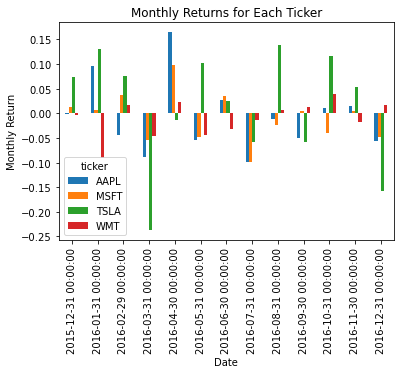

In [7]:
# Create a pivot table for daily returns
# Calculate daily returns
data['daily_return'] = data.groupby('ticker')['adj_close'].pct_change()
pivot_table = data.pivot_table(values='daily_return', index='date', columns='ticker')

# Resample data to monthly frequency
monthly_data = pivot_table.resample('M').sum()

# Plot the monthly returns for each ticker
monthly_data.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.title('Monthly Returns for Each Ticker')
plt.show()

### In this pre-processing code, we first loaded the data using api key and converted the 'date' column to datetime format. We then checked for missing values from the dataset. After that, we calculated the daily returns for each ticker and created a pivot table to store the data. We resampled the data to monthly frequency and plotted the monthly returns for each ticker.


### From this chart, we can see that both Tesla had more positive return compared to others for most of the year. Apple had the highest return in the month of April 2016,which may be due to some positive news or event that occurred during that time. Tesla perfomance is consistent and positive for most of the months.

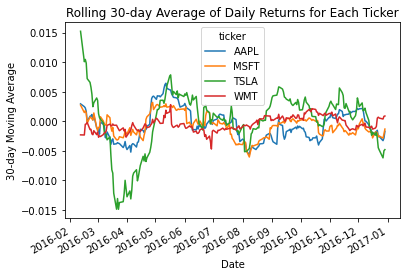

In [8]:
# Calculate rolling 30-day average of daily returns
rolling_30 = pivot_table.rolling(window=30).mean()

# Plot the rolling 30-day average of daily returns for each ticker
rolling_30.plot()
plt.xlabel('Date')
plt.ylabel('30-day Moving Average')
plt.title('Rolling 30-day Average of Daily Returns for Each Ticker')
plt.show()

### From this chart, we can see that the rolling 30-day average of daily returns for both Walmart and Microsoft was mostly consistent throughout the year, with a few dips and spikes. We can also see that there were periods when the returns for both companies moved in sync, and periods when they moved in opposite directions. Along with this, Tesla has the highest dips and spikes.



In [9]:
#summary statistics
data['adj_close'].describe()

count    1012.000000
mean      108.183718
std        62.503100
min        46.771913
25%        60.747134
50%        80.297426
75%       123.057338
max       265.420000
Name: adj_close, dtype: float64

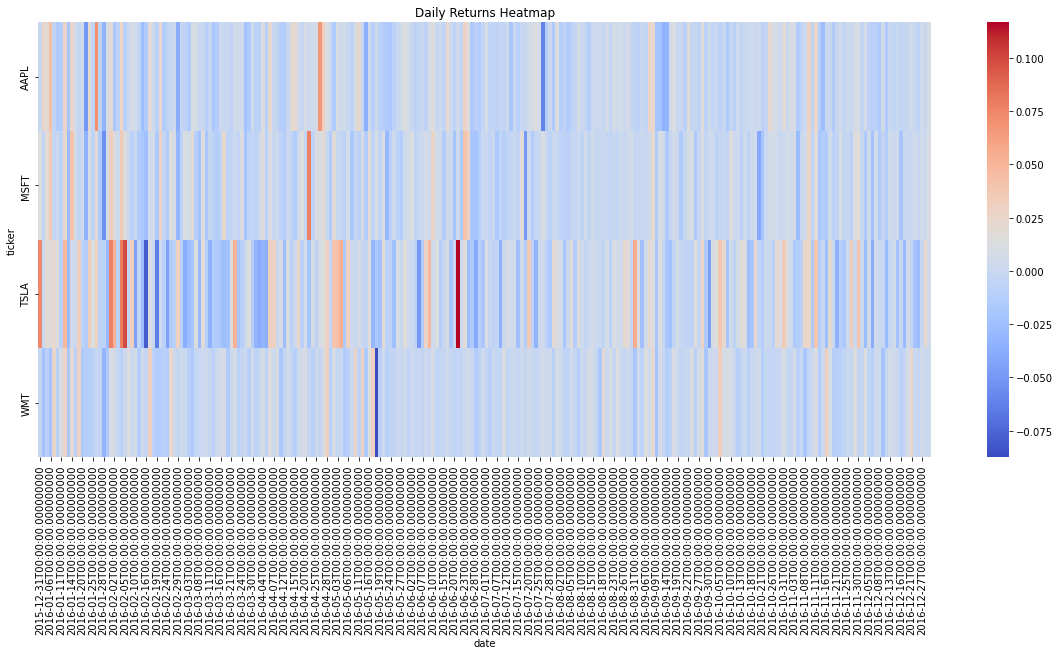

In [13]:
# Calculate daily returns
data['daily_return'] = data.groupby('ticker')['adj_close'].pct_change()

# Create a heatmap of daily returns for each ticker
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(data.pivot_table(values='daily_return', index='ticker', columns='date'), cmap='coolwarm')
plt.title('Daily Returns Heatmap')
plt.show()

### From this heatmap, we can see that the daily returns for Walmart is mostly centered around zero, with some variation in the magnitude of the returns. We can also see that there are some periods where the daily returns for one ticker are higher than the daily returns for the other ticker. For example, there is a period in early 2016 where the daily returns for Tesla are consistently higher than the daily returns of any other company. Overall, this visualization provides a good way to see how the daily returns for each ticker have varied over time.

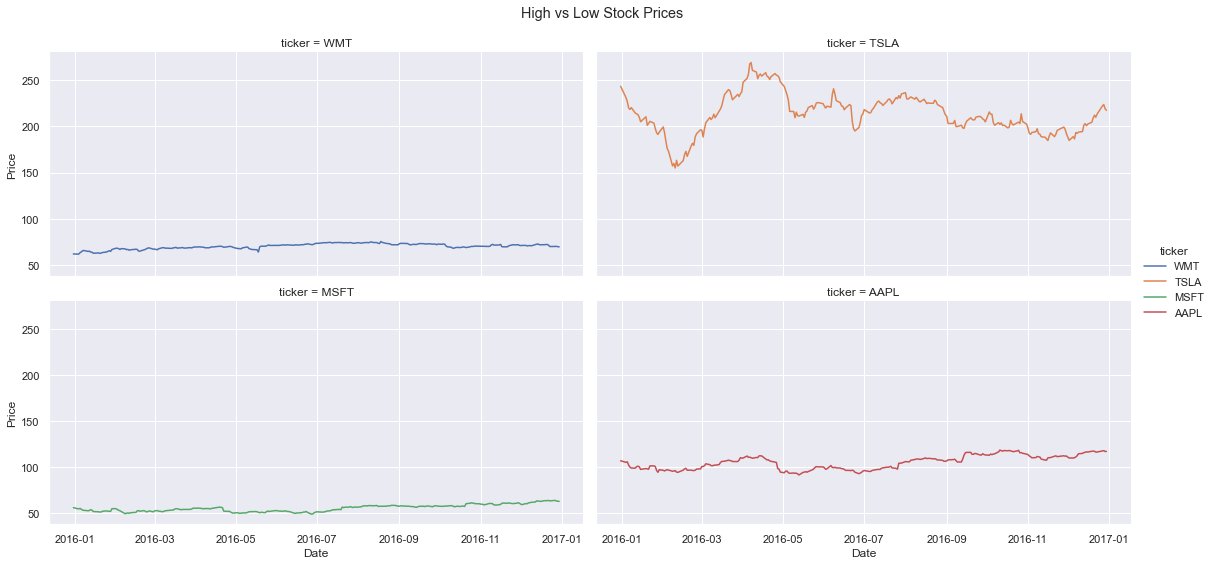

In [14]:
import seaborn as sns

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,8)})

g = sns.relplot(x='date', y='high', kind='line', data=data, hue='ticker', col='ticker', col_wrap=2, height=4, aspect=2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('High vs Low Stock Prices')
g.set_axis_labels('Date', 'Price')


### The high is the highest price at which a stock is traded during a period. The low is the lowest price of that same period. A stock's high and low points for the day are often called its intraday high and low. The High and Low of the stocks almost overlap each other, indicating that the range of Highs and Lows for the day was about the same. There are a few exceptions with an increasingly large value of High as compared to the Low. These could be indicators of a bullish market.

# Time Series Analysis

### We can perform the ADF test on the stock data to check if the time series is stationary or not. 

In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the stock data
adf_result = adfuller(data['close'])

# Print the p-value
print('ADF p-value:', adf_result[1])


ADF p-value: 0.23142199219802934


### The null hypothesis of the ADF test is that the time series has a unit root, indicating that it is non-stationary. If the p-value is less than a significance level (e.g. 0.05), we can reject the null hypothesis and conclude that the time series is stationary.

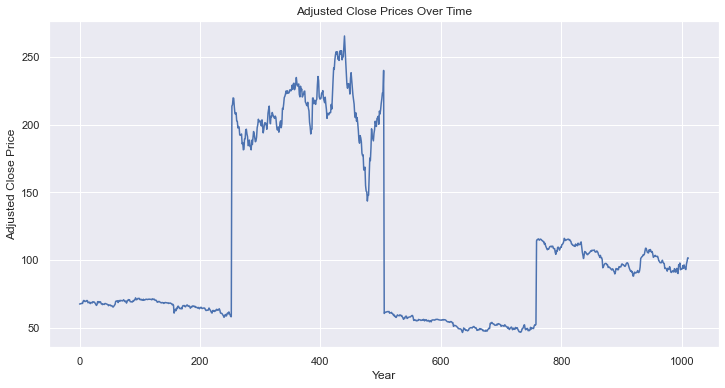

In [23]:
# Plot time series data
plt.figure(figsize=(12,6))
plt.plot(data['adj_close'])
plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.show()


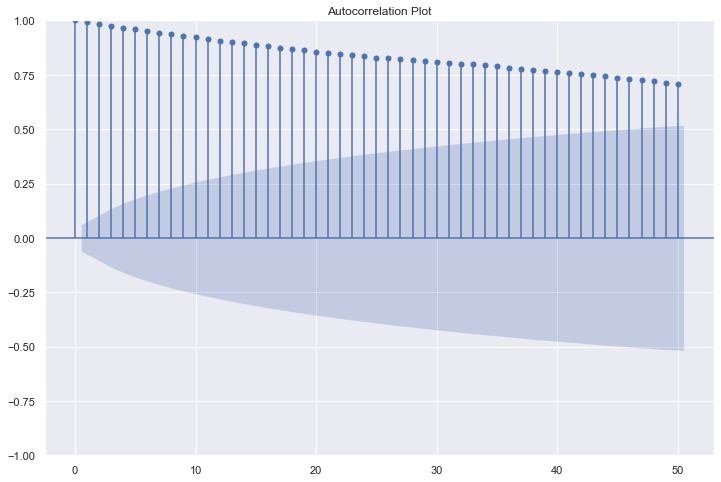

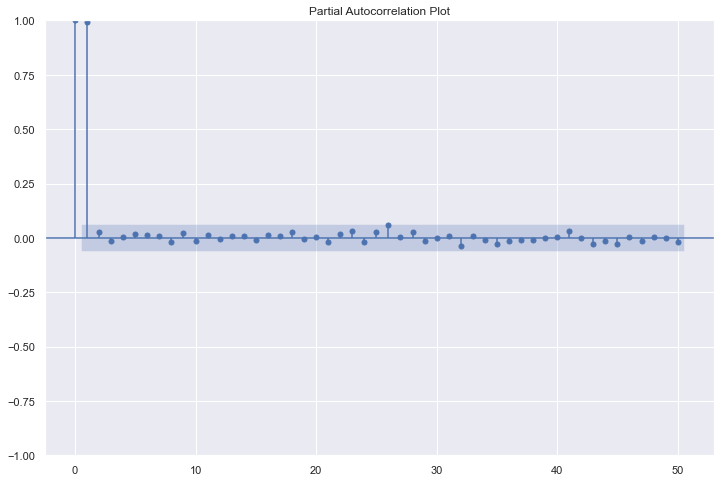

In [28]:
# Plot autocorrelation and partial autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
plot_acf(data['adj_close'], lags=50)
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(data['adj_close'], lags=50,method = 'ywm')
plt.title('Partial Autocorrelation Plot')
plt.show()

### The autocorrelation plot (ACF) shows the correlation between a time series and its lagged values. The partial autocorrelation plot (PACF) shows the correlation between a time series and its lagged values, while controlling for the values of the intermediate lags.These plots help in identifying the appropriate values of p, d, and q for the ARIMA and SARIMA models. Specifically, the ACF plot can help identify the value of q by looking at the lag at which the autocorrelation first becomes non-significant. Similarly, the PACF plot can help identify the value of p by looking at the lag at which the partial autocorrelation first becomes non-significant.In addition, the plots can also provide information about the presence of seasonality in the data, which can be useful in determining the appropriate values for P, D, and Q for the seasonal component of the SARIMA model.

In [43]:
# Define train and test sets
train = data['adj_close'][:-12]
test = data['adj_close'][-12:]

# Fit and evaluate ARIMA model
arima = ARIMA(train, order=(2,2,1)).fit()
arima_predictions = arima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate ARIMA predictions
arima_rmse = np.sqrt(np.mean((arima_predictions - test)**2))
print('ARIMA RMSE:', arima_rmse)

# Fit and evaluate SARIMA model
sarima = SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,12)).fit()
sarima_predictions = sarima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Evaluate SARIMA predictions
sarima_rmse = np.sqrt(np.mean((sarima_predictions - test)**2))
print('SARIMA RMSE:', sarima_rmse)


ARIMA RMSE: 3.9863596836386903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62271D+00    |proj g|=  4.27570D-02


 This problem is unconstrained.



At iterate    5    f=  3.50323D+00    |proj g|=  6.73075D-03

At iterate   10    f=  3.50187D+00    |proj g|=  3.13448D-03

At iterate   15    f=  3.50138D+00    |proj g|=  5.84749D-04

At iterate   20    f=  3.50134D+00    |proj g|=  3.08545D-04

At iterate   25    f=  3.50134D+00    |proj g|=  3.27298D-04

At iterate   30    f=  3.50134D+00    |proj g|=  1.54679D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     36      1     0     0   7.546D-06   3.501D+00
  F =   3.5013360541239518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA RMSE: 4.161792268486383


### Based on the results, the RMSE of the ARIMA model is 3.9863596836386903and the RMSE of the SARIMA model is 4.1617922684863383. The lower the RMSE, the better the model fits the data. Therefore, the ARIMA model performs slightly better in terms of the RMSE. 